#### Import necessary libraries

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

 #### Get the loan data from csv file to pandas dataframe

In [268]:
loan_Information_df = pd.read_csv(r"C:\Users\Mrunmayee Dixit\Documents\Upgrad\Case Study\Lending Club Case Study\loan\loan.csv")
loan_Information_df.shape

C:\Users\Mrunmayee Dixit\AppData\Local\Temp\ipykernel_25440\2331117883.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_Information_df = pd.read_csv(r"C:\Users\Mrunmayee Dixit\Documents\Upgrad\Case Study\Lending Club Case Study\loan\loan.csv")


(39717, 111)

## Data cleaning activity 

### Fix Rows and Columns - 
1. There are no header and footer rows which we need to delete.
2. No summery rows  like total, subtotal rows.
3. No Extra rows indicating column numbers.
4. No absent column names.
5. Deleting unecessary columns is required. which contain more null values and which are not very relevent for our case study.

In [269]:
# Deleting the columns with null values
loan_Information_df.drop(loan_Information_df.columns[loan_Information_df.isna().all()], axis = 1, inplace = True)
loan_Information_df.shape

(39717, 57)

In [270]:
# list of remaining columns
loan_Information_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

Removing columns which does not impact on the occurance of default

In [271]:
# Removing unwanted columns for this case study

loan_Information_df = loan_Information_df.drop(['id', 'member_id', 'pymnt_plan', 'url', 'desc', 'zip_code', 'delinq_2yrs','earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq','mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal','revol_util', 'total_acc', 'initial_list_status', 'out_prncp','out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp','total_rec_int', 'total_rec_late_fee', 'recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt','next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med','policy_code', 'application_type', 'acc_now_delinq','chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies','tax_liens'], axis = 1)
loan_Information_df.shape

(39717, 20)

In [272]:
loan_Information_df1=loan_Information_df[loan_Information_df.loan_status != 'Current']

In [273]:
loan_Information_df1.shape

(38577, 20)

In [274]:
loan_Information_df1.head(100)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,total_pymnt
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,5863.155187
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,1008.710000
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,3005.666844
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,12231.890000
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,5632.210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,6000,6000,6000.0,36 months,8.90%,190.52,A,A5,A Touch Of Italy,8 years,OWN,28800.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Debt consolidation,NJ,13.17,6858.700001
103,7200,7200,7200.0,36 months,9.91%,232.02,B,B1,New York Living Solutions,6 years,RENT,135000.0,Not Verified,Dec-11,Fully Paid,credit_card,Say goodbye to the rip-off banks,NY,6.12,8352.709998
104,9500,9500,9500.0,36 months,8.90%,301.66,A,A5,Natex Architects,7 years,MORTGAGE,50000.0,Not Verified,Dec-11,Fully Paid,credit_card,Credit Card Loan,TX,8.18,10495.821260
105,18825,18825,18800.0,60 months,16.77%,465.53,D,D2,Texas Health & Human Services Commission,10+ years,RENT,38000.0,Verified,Dec-11,Charged Off,debt_consolidation,Coledon's Club Loan,TX,23.18,18749.250000


In [275]:
loan_Information_df1['emp_length'] =loan_Information_df1['emp_length'].replace('10+ years', '10', regex=True)
loan_Information_df1['emp_length'] =loan_Information_df1['emp_length'].replace(' years', '', regex=True)
loan_Information_df1['emp_length'] =loan_Information_df1['emp_length'].replace(' year', '', regex=True)
loan_Information_df1['emp_length'] =loan_Information_df1['emp_length'].replace('< 1', '0', regex=True)
loan_Information_df1['emp_length'] =loan_Information_df1['emp_length'].replace(' ', '', regex=True)
loan_Information_df1['emp_length'] =loan_Information_df1['emp_length'].str.replace('+', '', regex=True)

loan_Information_df1['term'] =loan_Information_df1['term'].replace(' months', '', regex=True)

loan_Information_df1['int_rate'] =loan_Information_df1['int_rate'].replace('%', '', regex=True)


loan_Information_df1.head(100)


C:\Users\Mrunmayee Dixit\AppData\Local\Temp\ipykernel_25440\221586810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_Information_df1['emp_length'] =loan_Information_df1['emp_length'].replace('10+ years', '10', regex=True)
C:\Users\Mrunmayee Dixit\AppData\Local\Temp\ipykernel_25440\221586810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_Information_df1['emp_length'] =loan_Information_df1['emp_length'].replace(' years', '', regex=True)
C:\Users\Mrunmayee Dixit\AppData\Local\Temp\ipykernel

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,total_pymnt
0,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,5863.155187
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,1008.710000
2,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,3005.666844
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,12231.890000
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,5632.210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,6000,6000,6000.0,36,8.90,190.52,A,A5,A Touch Of Italy,8,OWN,28800.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Debt consolidation,NJ,13.17,6858.700001
103,7200,7200,7200.0,36,9.91,232.02,B,B1,New York Living Solutions,6,RENT,135000.0,Not Verified,Dec-11,Fully Paid,credit_card,Say goodbye to the rip-off banks,NY,6.12,8352.709998
104,9500,9500,9500.0,36,8.90,301.66,A,A5,Natex Architects,7,MORTGAGE,50000.0,Not Verified,Dec-11,Fully Paid,credit_card,Credit Card Loan,TX,8.18,10495.821260
105,18825,18825,18800.0,60,16.77,465.53,D,D2,Texas Health & Human Services Commission,10,RENT,38000.0,Verified,Dec-11,Charged Off,debt_consolidation,Coledon's Club Loan,TX,23.18,18749.250000


In [276]:
#delete the rows with null values for emp_length
loan_Information_df1 = loan_Information_df1.drop(loan_Information_df1[loan_Information_df1.emp_length.isna()].index)

In [278]:
#change the type of column to int
loan_Information_df1["emp_length"] = loan_Information_df1["emp_length"].astype(int)
loan_Information_df1["int_rate"] = loan_Information_df1["int_rate"].astype(float)

In [279]:
print(loan_Information_df1.emp_length.dtype)
print(loan_Information_df1.int_rate.dtype)

int32
float64


### Univariate Analysis

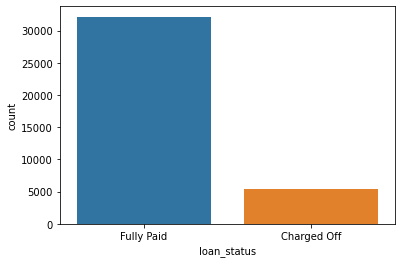

In [280]:
# defaulters distrubution over given dataset
sbn.countplot(x= loan_Information_df1["loan_status"])
plt.show()

In [281]:
ChangedOfflength = len(loan_Information_df1[loan_Information_df1['loan_status']=='Charged Off'])
total_length = len(loan_Information_df1)
defaulterPercentage = int(ChangedOfflength)*100/int(total_length)
round(defaulterPercentage)

14

#### Observation

From above 'loan_status' plot we understand that there are around 14% of defaulters

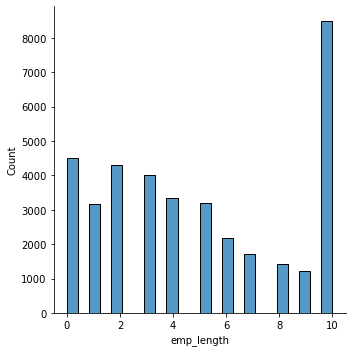

In [282]:
# check which range of experience people take more loan
sbn.displot(loan_Information_df1["emp_length"])

In [283]:
total_emp_length = len(loan_Information_df1)
aboveTenSize = len(loan_Information_df1[loan_Information_df1.emp_length > 8])
loanAfterTenYearsOfExperience = aboveTenSize*100/total_emp_length
round(loanAfterTenYearsOfExperience)

26

#### Observation 

From above plot its clear that more number of loans are taken by people with around 10 years of experience i.e. around 26% of applicants are with around 10 years of experience

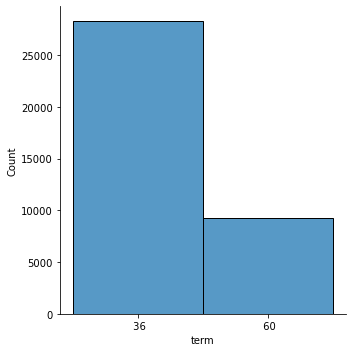

In [284]:
# The term for which generally loans are taken
sbn.displot(loan_Information_df1["term"])

In [285]:
term_total = len(loan_Information_df1)
duration = len(loan_Information_df1[loan_Information_df1["term"]==" 36"])
percentageOfterm = duration*100/term_total
round(percentageOfterm)

75

#### Observation

More number of people prefer to thake the loan for 35 months rather than 60 months i.e. for shorter duration.

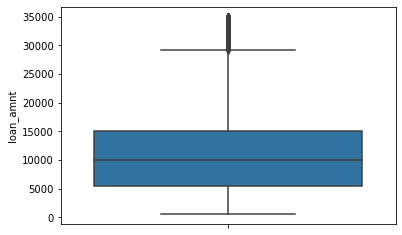

In [286]:
# loan amount reprenation
sbn.boxplot( y=loan_Information_df1["loan_amnt"] )
plt.show()

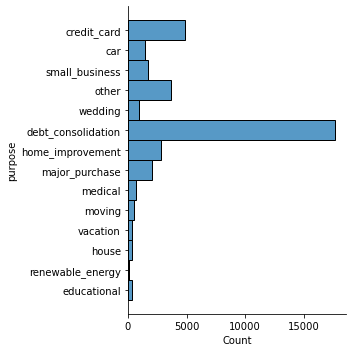

In [288]:
# The reasons for which loan is taken

sbn.displot(y=loan_Information_df1["purpose"])


#### Observation 
Maximum number of people take loan for dept_consolidation.

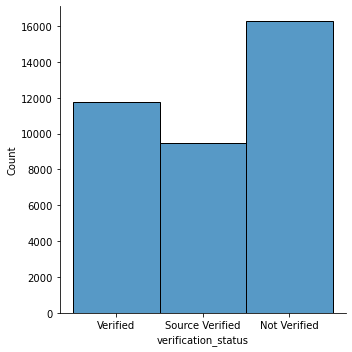

In [289]:
# How many applicants are verified
sbn.displot(loan_Information_df1["verification_status"])

In [290]:
nonVerifiedApplicants = len(loan_Information_df1[loan_Information_df1.verification_status=='Not Verified'])*100/len(loan_Information_df1)
print(round(nonVerifiedApplicants))
sourceVerifiedApplicants = len(loan_Information_df1[loan_Information_df1.verification_status=='Source Verified'])*100/len(loan_Information_df1)
print(round(sourceVerifiedApplicants))

43
25


#### Observation
1. Approfimately 43% of total loan applicants are not verified. 
2. Only 25% loan applicants are source verified.

### Bivariate Analysis

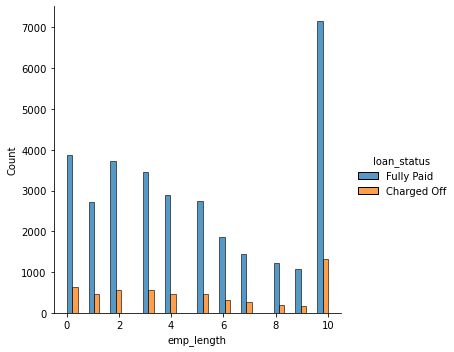

In [164]:
# Try to find relation between employee experience length and defaulters
sbn.displot(loan_Information_df1, x=loan_Information_df1["emp_length"], hue=loan_Information_df1["loan_status"],  multiple="dodge")
plt.show()

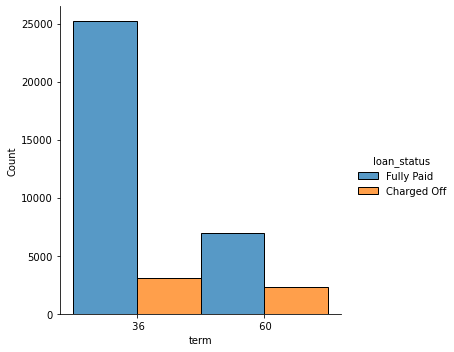

In [207]:
# Find the corellation between term of loan and percentage of defaulters
sbn.displot(loan_Information_df1, x=loan_Information_df1["term"], hue=loan_Information_df1["loan_status"],  multiple="dodge")
plt.show()

In [219]:
ChargeOffFor60MonthDurationPercentage =len(loan_Information_df1[(loan_Information_df1.term==' 60') & (loan_Information_df1.loan_status=='Charged Off')])*100/(len(loan_Information_df1[loan_Information_df1.term==' 60']))

print(ChargeOffFor60MonthDurationPercentage)

ChargeOffFor36MonthDurationPercentage = len(loan_Information_df1[(loan_Information_df1.term==' 36') & (loan_Information_df1.loan_status=='Charged Off')])*100/(len(loan_Information_df1[loan_Information_df1.term==' 36']))

print(ChargeOffFor36MonthDurationPercentage)

25.126930971156963
10.863647611977234


#### Observation 
Loan Applicants who have taken loan for longer duration are tent to become defaulters as compared to short term loan applicants. 

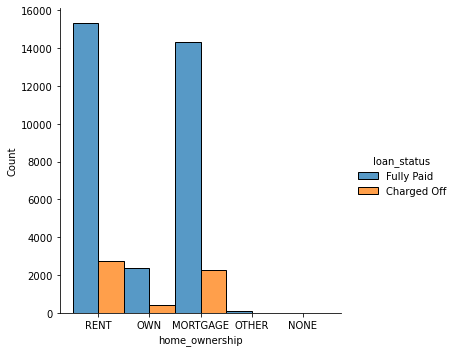

In [208]:
#Check how does home_ownershit affect the on account of defaulets
sbn.displot(loan_Information_df1, x=loan_Information_df1["home_ownership"], hue=loan_Information_df1["loan_status"],  multiple="dodge")
plt.show()

In [253]:
rentedPercentateOfDefaulters = len(loan_Information_df1[(loan_Information_df1.home_ownership=='RENT') & (loan_Information_df1.loan_status=='Charged Off')])*100/(len(loan_Information_df1.home_ownership=='RENT'))
print(rentedPercentateOfDefaulters)                                                 

OwnPercentateOfDefaulters = len(loan_Information_df1[(loan_Information_df1.home_ownership=='OWN') & (loan_Information_df1.loan_status=='Charged Off')])*100/(len(loan_Information_df1.home_ownership=='OWN'))
print(OwnPercentateOfDefaulters)
                                                     
MortgagePercentateOfDefaulters = len(loan_Information_df1[(loan_Information_df1.home_ownership=='MORTGAGE') & (loan_Information_df1.loan_status=='Charged Off')])*100/(len(loan_Information_df1.home_ownership=='MORTGAGE'))
print(MortgagePercentateOfDefaulters)

7.287449392712551
1.0654165778819518
5.979650543362455


#### Observation 

Loan applicants are tend to default when they have rent the stay or they have taken loan for stay or property.

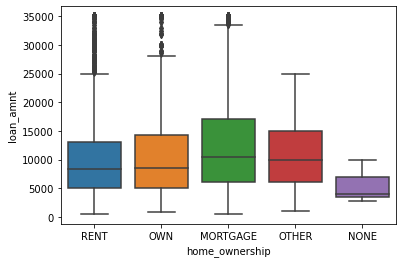

In [216]:
# Comaring loan amount with people owing there own place to stay
sbn.boxplot( y=loan_Information_df1["loan_amnt"], x= loan_Information_df1["home_ownership"])
plt.show()

#### Observation 

Application for loan have taken high amount loans when they already have loan for there home

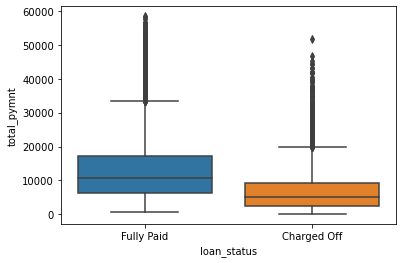

In [221]:
# Comparing loan amountamount paid with loan status
sbn.boxplot( y=loan_Information_df1["total_pymnt"], x= loan_Information_df1["loan_status"])
plt.show()

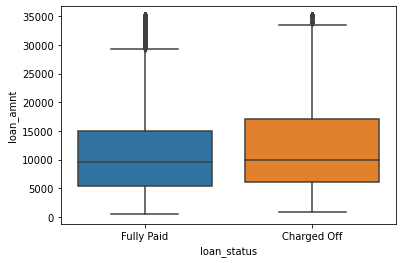

In [222]:
# Comparing loan amount with loan status
sbn.boxplot( y=loan_Information_df1["loan_amnt"], x= loan_Information_df1["loan_status"])
plt.show()

#### Observation for above 2 plots

1. As we can see from above 2 plot, then we can say that 5000*5000(approx number of defaulters * approx mean of loan amt - approx mean of total pmt for charged off) i.e. mean loss for the company will be 25000000 
2.  maximum loss  = approx. : 5000*7500 = 37500000
3. minimum loss = approx.  5000*2500 = 12500000
2. From above plot the applicants taken loan for higher loan amount tend to be defaulters

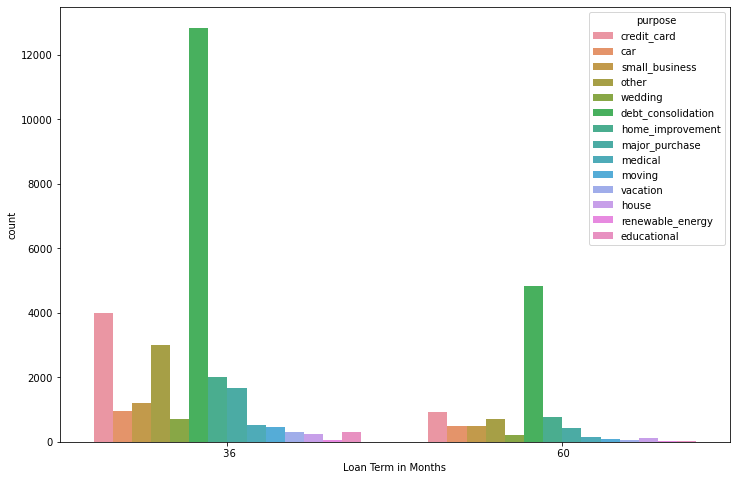

In [231]:
# The reasons for which people take loan in differt terms
plt.figure(figsize=(12,8))
sbn.countplot( x="term", hue='purpose', data=loan_Information_df1)
plt.xlabel('Loan Term in Months')
plt.show()

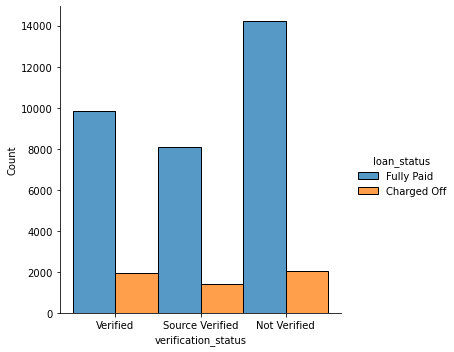

In [250]:
#Does verification of users affect the number of defaults?
sbn.displot(loan_Information_df1, x=loan_Information_df1["verification_status"], hue=loan_Information_df1["loan_status"],  multiple="dodge")
plt.show()

In [251]:
verifiedPercentateOfDefaulters = len(loan_Information_df1[(loan_Information_df1.verification_status=='Verified') & (loan_Information_df1.loan_status=='Charged Off')])*100/(len(loan_Information_df1.verification_status=='Verified'))
print(rentedPercentateOfDefaulters)                                                 

SourceVerifiedPercentateOfDefaulters = len(loan_Information_df1[(loan_Information_df1.verification_status=='Source Verified') & (loan_Information_df1.loan_status=='Charged Off')])*100/(len(loan_Information_df1.verification_status=='Source Verified'))
print(OwnPercentateOfDefaulters)
                                                     
NotVerifiedPercentateOfDefaulters = len(loan_Information_df1[(loan_Information_df1.verification_status=='Not Verified') & (loan_Information_df1.loan_status=='Charged Off')])*100/(len(loan_Information_df1.verification_status=='Not Verified'))
print(MortgagePercentateOfDefaulters)

7.287449392712551
1.0654165778819518
5.979650543362455


#### Observation 
If the loan applicant is source verified then chances of that person being defaulter is less.
So, effort should be maid that all the applicants are source verified.

<AxesSubplot:xlabel='loan_status'>

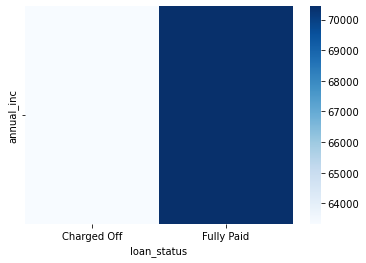

In [265]:
# Does annual income affect on defaults?
HM = pd.pivot_table(data=loan_Information_df1, columns = 'loan_status', values = 'annual_inc')
sbn.heatmap(HM,cmap='Blues')

#### Observation 
1. Annual Income highly impact the defaulters
2. Above plot shows that loan applicants with less annual income are the defaulters

<AxesSubplot:xlabel='loan_status'>

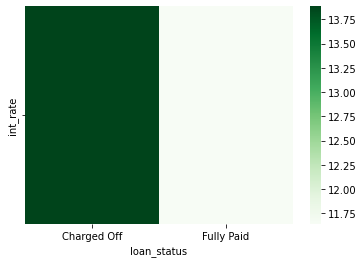

In [291]:
# Does intrest rate affect on defaults?
HM = pd.pivot_table(data=loan_Information_df1, columns = 'loan_status', values = 'int_rate')
sbn.heatmap(HM,cmap='Greens')

#### Observation
1. high interest rate lead to more defaulters
2. low interest rate result in less number of defaulters

<AxesSubplot:xlabel='loan_status', ylabel='home_ownership'>

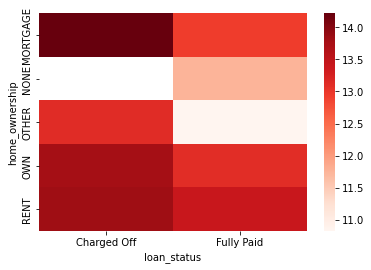

In [295]:
# Does intrest rate affect on defaults?
HM = pd.pivot_table(data=loan_Information_df1,index='home_ownership', columns = 'loan_status', values = 'dti')
sbn.heatmap(HM,cmap='Reds')

#### Observation 
Loan applicants who have high 'dti' 1.e. above 14 percentage + Mortgage are defaulters